## Problem 1
I will be critiquing the plots from Saul Perlmutter's seminal publication on the discovery of steadily increasing redshift. The following plot is what he used to determine a good estimate for the expansion constant of the universe:
<img src="./perlmutter_captioned.png">
The one I want to comment on is the conclusion that he derives from this graph:
<img src="./perlmutter_color.png">

Here he illustrates the different options that expansion constants imply. I believe that the use of shading to illustrate the confidence levels of the different regions is very clever and the colors are clear and distinct. Overall, it is an excellent plot. That being said, I'm not sure the confidence intervals were necessary and could have been ommitted in order to make the plot cleaner and perhaps more room to label other interesting regions. Furthermore, it is not immediately obvious without reading the caption how the red contour is related to the others and I firmly believe that there is a more subtle way to imply that it is the convolution of the the two sets of data.

## Problem 2
Here, I've recalled an old plot that was related to the trigger efficiency of our detector. The method to finding the efficiency was complicated but we essentially ended up with the following graph of the minimum input signal in count samples in order to achieve 98% efficiency for every run. Each of these points, comes from a separate graph, which it can be useful to see if anything looks weird or off. So my improvement is simply to find a convenient and intuitive way to see the underlying plot to each point. 

<img src="./trigger_zoom-1.png">

In [1]:
#here I copy some old python code. It's ugly because it's like 3 years old and I was a lot worse back then
import numpy as np
import scipy as sp
import re
from matplotlib import rc, gridspec, cm
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Read in sets of data from file using "loadtxt()".
run, source, capacitor = np.genfromtxt('./RunSourcesCamp6.txt', unpack=True, skip_header=2, delimiter = ' | ',dtype = 'str')
effrun, eff10, eff50, eff95, eff98, asy, asyerr = sp.loadtxt('./effic_rates_asym_list6008_to_7592.txt', unpack = True, skiprows = 1,delimiter = '\t')

#datatype because everything sucks
run = run.astype(np.int)

#First find the intersecting values
commonruns = np.intersect1d(run, effrun)

#Now alter the lists to be only the common runs (first alter the spemeans and stuff)
eff10 = [eff10[x] for x in [np.where(effrun==commonruns[i])[0][0] for i in range(0,len(commonruns))]]
eff50 = [eff50[x] for x in [np.where(effrun==commonruns[i])[0][0] for i in range(0,len(commonruns))]]
eff95 = [eff95[x] for x in [np.where(effrun==commonruns[i])[0][0] for i in range(0,len(commonruns))]]
eff98 = [eff98[x] for x in [np.where(effrun==commonruns[i])[0][0] for i in range(0,len(commonruns))]]

source = [source[x] for x in [np.where(run==commonruns[i])[0][0] for i in range(0,len(commonruns))]]
capacitor = [capacitor[x] for x in [np.where(run==commonruns[i])[0][0] for i in range(0,len(commonruns))]]

trigg10_avg = np.mean(eff10)
trigg50_avg = np.mean(eff50)
trigg95_avg = np.mean(eff95)
trigg98_avg = np.mean(eff98)

#Get all the different sources
sources = []
for i in range(0,len(effrun)):
    if (source[i].find("YBe + strong 57Co") !=-1) or (source[i].find("YBe  ")!= -1):
        source[i] = "YBe + strong Co57 + 2 Pb sheets"
    if source[i].find("YAl  ") !=-1:
        source[i] = "YAl + strong Co57 + 2 Pb sheets"
    if source[i].find("strong 57Co + 2 Pb sheets") !=-1:
        source[i] = "strong Co57 + 2 Pb sheets"
for i in range(0,len(effrun)):
    if not source[i] in sources:
        sources.append(source[i])

#arrange by sources
sourceinfo = []
for m in range(0,len(sources)):
    sourcex = []
    sourceff = []
    for q in range(0,len(effrun)):
        if source[q] == sources[m]:
            sourcex.append(effrun[q]) #run[q]
            sourceff.append(eff98[q])
    myvec = []
    myvec.append(sourcex)
    myvec.append(sourceff)
    myvec.append(sources[m])
    sourceinfo.append(myvec)

In [2]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Panel, Tabs, TextInput
from bokeh.plotting import figure
import seaborn.apionly as sns
import itertools

output_notebook()

ncolors = len(sources) + 1
palette = sns.palettes.color_palette('viridis', ncolors)
colors = itertools.cycle(palette.as_hex())

p = figure(title="Trigger Efficiencies", plot_height=600, plot_width=600, x_axis_label='Run Number', y_axis_label='Minimum Charge Required to Achieve 98% Efficiency')


for i,c in zip(range(0,len(sources)), colors):
    datalabel = sourceinfo[i][2]
    p.scatter(sourceinfo[i][0],sourceinfo[i][1],color = c, legend = datalabel)

/media/shared/Public/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


Loading BokehJS ...

Below is the interactive plot. The "Plot" tab corresponds to the interactive version of first plot shown and the "Raw" tab corresponds to the input data for each point. You can change which plot is being viewed by selecting a different run from the drop down menu.

In [4]:
#add in the sweet interactions
output_notebook()

val = 6008
path = "./ohlord/run_" + str(val) + ".txt"

x,y = sp.loadtxt(path, unpack = True, skiprows = 0,delimiter = '\t')
p2 = figure(title="Raw Efficiency", plot_height=600, plot_width=600, x_axis_label='Integrated Charge (Count*Samples)', y_axis_label='Trigger Efficiency')
r = p2.scatter(x,y,color = 'red')

tab1 = Panel(child=p, title="Plot")
tab2 = Panel(child=p2, title="Raw")

tabs = Tabs(tabs=[ tab1, tab2 ])
def raw(Run):
    path = "./ohlord/run_" + str(Run).rstrip(".0") + ".txt"
    x,y = sp.loadtxt(path, unpack = True, skiprows = 0,delimiter = '\t')
    r.data_source.data['x'] = x
    r.data_source.data['y'] = y
    push_notebook()

show(tabs, notebook_handle=True)

interact(raw,Run = effrun)

Loading BokehJS ...

interactive(children=(Dropdown(description='Run', options=(6008.0, 6019.0, 6020.0, 6220.0, 6221.0, 6222.0, 6223.0, 6224.0, 6248.0, 6260.0, 6261.0, 6265.0, 6266.0, 6270.0, 6271.0, 6280.0, 6291.0, 6310.0, 6311.0, 6313.0, 6315.0, 6316.0, 6373.0, 6435.0, 6436.0, 6438.0, 6439.0, 6485.0, 6486.0, 6487.0, 6488.0, 6489.0, 6490.0, 6491.0, 6492.0, 6493.0, 6494.0, 6495.0, 6496.0, 6497.0, 6498.0, 6499.0, 6500.0, 6501.0, 6502.0, 6503.0, 6504.0, 6505.0, 6506.0, 6507.0, 6508.0, 6509.0, 6510.0, 6511.0, 6512.0, 6513.0, 6514.0, 6515.0, 6516.0, 6517.0, 6518.0, 6519.0, 6520.0, 6521.0, 6522.0, 6523.0, 6524.0, 6525.0, 6526.0, 6527.0, 6528.0, 6529.0, 6530.0, 6531.0, 6532.0, 6533.0, 6534.0, 6535.0, 6536.0, 6537.0, 6538.0, 6539.0, 6540.0, 6541.0, 6542.0, 6543.0, 6544.0, 6545.0, 6546.0, 6547.0, 6548.0, 6549.0, 6550.0, 6551.0, 6552.0, 6553.0, 6554.0, 6555.0, 6556.0, 6557.0, 6558.0, 6559.0, 6560.0, 6561.0, 6562.0, 6563.0, 6564.0, 6565.0, 6566.0, 6567.0, 6568.0, 6569.0, 6571.0, 6572.0, 6626.0, 6627.0, 6629.0, 6630.0, 6632.0, 6633.0, 6635.0, 6636.0, 6642.0, 6643.0, 6686.0, 6739.0, 6740.0, 6742.0, 6743.0, 6778.0, 6830.0, 6831.0, 6833.0, 6834.0, 6890.0, 6943.0, 6944.0, 6946.0, 6947.0, 7055.0, 7056.0, 7058.0, 7059.0, 7127.0, 7206.0, 7207.0, 7210.0, 7211.0, 7249.0, 7302.0, 7303.0, 7307.0, 7308.0, 7350.0, 7421.0, 7422.0, 7427.0, 7428.0, 7474.0, 7475.0, 7479.0, 7481.0, 7485.0, 7486.0, 7529.0, 7586.0, 7587.0, 7591.0, 7592.0), value=6008.0), Output()), _dom_classes=('widget-interact',))

<function __main__.raw>

## Problem 3
Recreated below with the code.

<input>:16: DeprecationWarning: invalid escape sequence \c
<input>:16: DeprecationWarning: invalid escape sequence \c
<input>:16: DeprecationWarning: invalid escape sequence \c
<ipython-input-137-d1189685a656>:16: DeprecationWarning: invalid escape sequence \c
  ax2.set_ylabel("Temperature ($^\circ$F)")


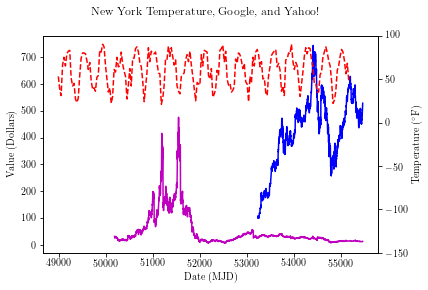

In [137]:
#moving on to the last one

nyd, temp = sp.loadtxt('./hw_2_data/ny_temps.txt', unpack = True, skiprows = 1,delimiter = '\t')
yd, ystock = sp.loadtxt('./hw_2_data/yahoo_data.txt', unpack = True, skiprows = 1,delimiter = '\t')
gd, gstock = sp.loadtxt('./hw_2_data/google_data.txt', unpack = True, skiprows = 1,delimiter = '\t')
fig, ax1 = plt.subplots()
fig.suptitle("New York Temperature, Google, and Yahoo!")
ax1.plot(yd,ystock,'m-')
ax1.plot(gd,gstock,'b-')
ax1.set_xlabel("Date (MJD)")
ax1.set_ylabel("Value (Dollars)")

ax2 = ax1.twinx()
ax2.plot(nyd,temp, 'r--')
ax2.set_ylim([-150,100])
ax2.set_ylabel("Temperature ($^\circ$F)")

plt.show()